In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [1]:
# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
df = pd.read_csv('titanic.csv')
df.shape

(891, 15)

In [6]:
df['fare_bin'] = pd.cut(df['fare'], 10, right=False)
pdf = df.groupby('fare_bin',observed=False,as_index=False)['survived'].mean()
pdf

,fare_bin,survived
0,"[0.0, 51.233)",0.318306
1,"[51.233, 102.466)",0.660377
2,"[102.466, 153.699)",0.741935
3,"[153.699, 204.932)",1.000000
4,"[204.932, 256.165)",0.636364
5,"[256.165, 307.398)",0.666667
6,"[307.398, 358.63)",NaN
7,"[358.63, 409.863)",NaN
8,"[409.863, 461.096)",NaN
9,"[461.096, 512.842)",1.000000


In [7]:
ts = pd.read_csv('flights.csv')
ts.shape

(144, 3)

### layout

[None, None, None, None, None, None, None, None, None, None]

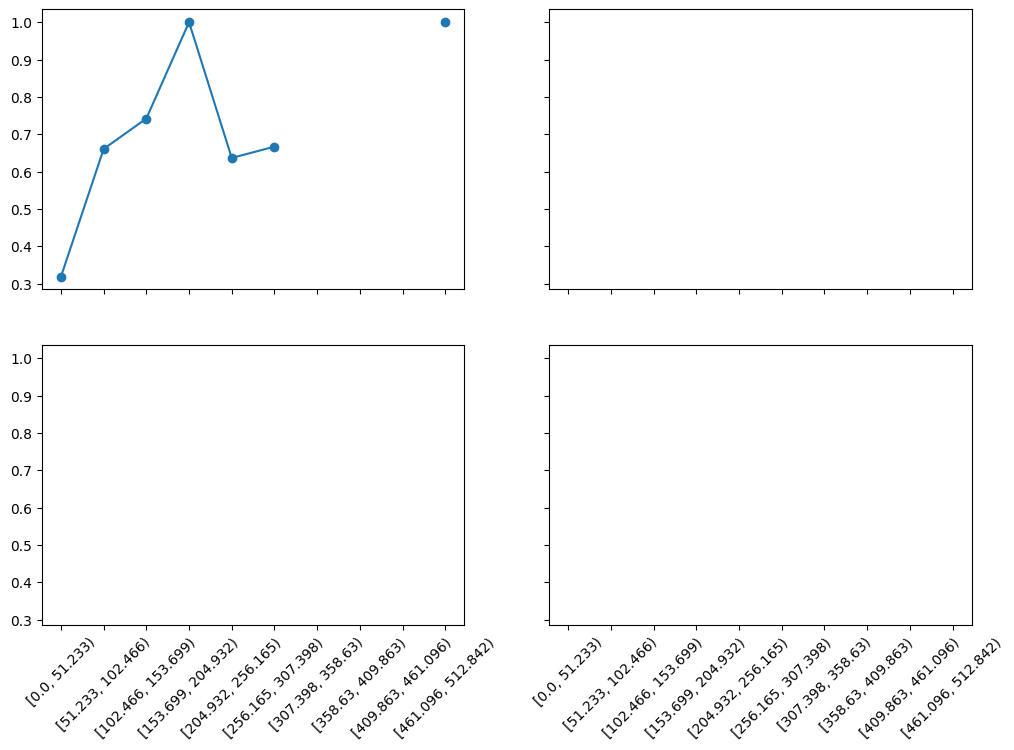

In [8]:
X = pdf.index
Y = pdf['survived']

fig, axs = plt.subplots(2,2, figsize=(12, 8), sharex=True, sharey=True)
axs[0, 0].plot(X, Y, marker='o')
axs[0, 0].xaxis.set_major_locator(mpl.ticker.FixedLocator(X))
axs[0, 0].xaxis.set_major_formatter(mpl.ticker.FixedFormatter(pdf['fare_bin'].astype(str)))
plt.setp(axs[1, 0].get_xticklabels(), rotation=45)
plt.setp(axs[1, 1].get_xticklabels(), rotation=45)

In [ ]:
plt.gridspec


In [5]:
mpl.gridspec

<module 'matplotlib.gridspec' from 'c:\\Users\\yzdom\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\gridspec.py'>

In [ ]:
ax.add_subplot


In [ ]:
ax.spines

### key types of plots

In [ ]:
plt.plot
plt.scatter
plt.bar
plt.text
plt.fill_between

In [ ]:
plt.errorbar
plt.hist
plt.boxplot

### key elements

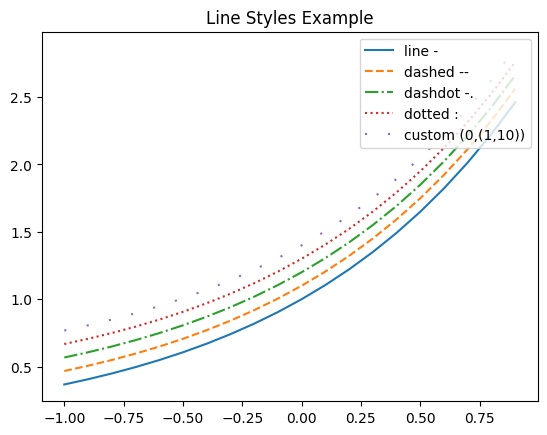

In [108]:
X = np.arange(-1, 1, 0.1)
Y = np.exp(X)

fig, ax = plt.subplots()

ax.plot(X, Y, linestyle= '-') # linestyle or ls argument
ax.plot(X, Y+0.1, ls ='--')
ax.plot(X, Y+0.2, ls='-.')
ax.plot(X, Y+0.3, ls=':')
ax.plot(X, Y+0.4, ls=(0,(1,10)))

ax.set_title('Line Styles Example')
ax.legend(['line -', 'dashed --', 'dashdot -.', 'dotted :', 'custom (0,(1,10))'], 
          loc='upper right')

In [ ]:
plt.plot(marker='o',markevery=10)

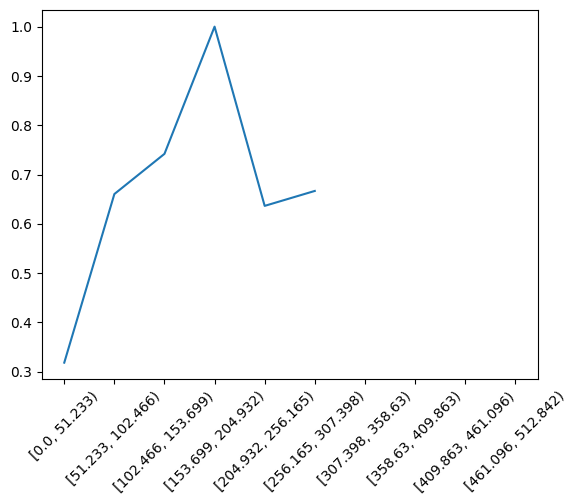

In [ ]:
pdf = df.groupby('fare_bin', observed=False, as_index=False)['survived'].mean()
X = pdf.index
Y = pdf['survived']

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mpl.Ticker.FixedLocator(X))
ax.xaxis.set_major_formatter(mpl.ticker.FixedFormatter(pdf['fare_bin'].astype(str)))
plt.setp(ax.get_xticklabels(), rotation=45)

ax.plot(X, Y, linestyle= '-')

In [ ]:
labels

In [ ]:
scales

In [ ]:
text

In [ ]:
legend

In [ ]:
grid

In [ ]:
color

### output

In [ ]:
png in folder

In [ ]:
excel

In [ ]:
slides